Przewidujemy dni zdrowia fizycznego na bazie generalnego samopoczucia i mentalnego

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, datasets, metrics

In [42]:
df = pd.read_csv('brfss_final.csv')
df.head()

,SLEPTIM1,BMI,GENHLTH,MENTHLTH,PHYSHLTH,DIABETE3,CVDINFR4,EXERANY2,SMOKE100,AGE80
0,6.0,25.06,3.0,0.0,0.0,3.0,1.0,2.0,1.0,55.0
1,4.0,23.69,1.0,0.0,0.0,3.0,2.0,2.0,1.0,67.0
2,8.0,23.03,1.0,25.0,26.0,3.0,2.0,2.0,2.0,21.0
3,7.0,23.75,1.0,0.0,0.0,3.0,2.0,1.0,2.0,57.0
4,1.0,45.24,3.0,1.0,5.0,3.0,2.0,1.0,2.0,54.0


In [43]:
#features = ['GENHLTH']
features = ['GENHLTH','MENTHLTH']
label = 'PHYSHLTH'

In [44]:
for feature in features:
    corelation = df[feature].corr(df[label])
    print(f"{feature} has {corelation} corelation with {label}",end="\n")

GENHLTH has 0.5180282423455247 corelation with PHYSHLTH
MENTHLTH has 0.3694396308302567 corelation with PHYSHLTH


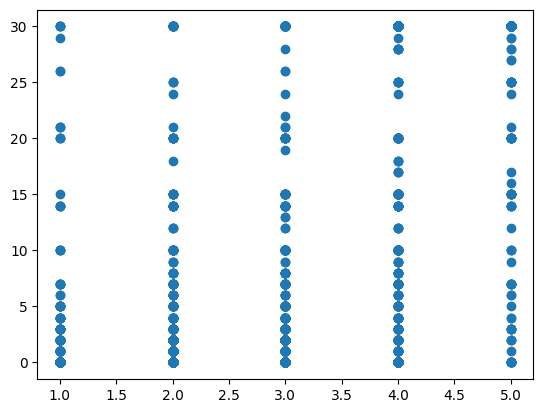

In [45]:
plt.scatter(df['GENHLTH'],df[label])
plt.draw()

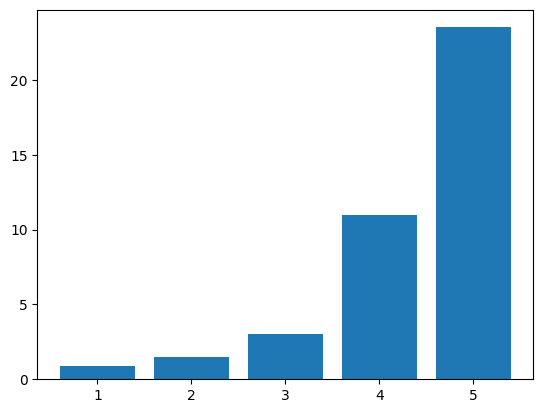

In [46]:
means = df.groupby('GENHLTH')[label].mean()
plt.bar(means.index, means.values)
plt.draw()


0.3694396308302567


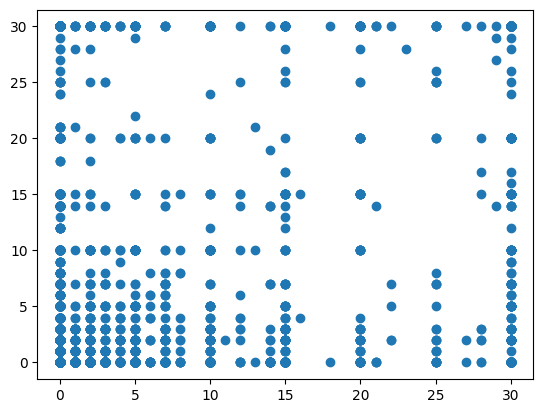

In [47]:
print(df['MENTHLTH'].corr(df[label]))
plt.scatter(df['MENTHLTH'],df[label])

In [48]:
selected = df[features + [label]]
selected

,GENHLTH,MENTHLTH,PHYSHLTH
0,3.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,25.0,26.0
3,1.0,0.0,0.0
4,3.0,1.0,5.0
...,...,...,...
4995,4.0,0.0,30.0
4996,3.0,10.0,7.0
4997,2.0,0.0,0.0
4998,4.0,7.0,10.0


In [49]:
X = selected['GENHLTH']
y = selected[label]
X.shape

(5000,)

In [50]:
#ilość wierszy ilość kolumn a -1 oznacza wstaw sam
X = X.to_numpy().reshape(-1,1)
X.shape

(5000, 1)

In [51]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2, random_state = 0)

In [52]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
predictions = model.predict(X_test)
predictions


array([-2.28033636,  6.1459361 ,  1.93279987, 14.57220856, 14.57220856,
        6.1459361 ,  6.1459361 , -2.28033636,  1.93279987,  6.1459361 ,
        6.1459361 ,  6.1459361 , 10.35907233,  6.1459361 ,  1.93279987,
       -2.28033636,  1.93279987,  6.1459361 , 14.57220856, -2.28033636,
        1.93279987,  6.1459361 , 10.35907233,  1.93279987, 10.35907233,
        1.93279987,  6.1459361 ,  6.1459361 ,  6.1459361 ,  6.1459361 ,
        1.93279987,  6.1459361 , 10.35907233, -2.28033636,  6.1459361 ,
       10.35907233,  6.1459361 ,  1.93279987, 10.35907233, 10.35907233,
        6.1459361 ,  6.1459361 ,  1.93279987, 10.35907233,  1.93279987,
       10.35907233,  1.93279987, -2.28033636,  1.93279987,  6.1459361 ,
       10.35907233,  1.93279987,  6.1459361 ,  1.93279987, 14.57220856,
       -2.28033636, -2.28033636, 14.57220856,  1.93279987,  1.93279987,
       10.35907233,  6.1459361 ,  1.93279987,  6.1459361 ,  1.93279987,
       -2.28033636, 14.57220856,  6.1459361 , 10.35907233,  6.14

In [54]:
mse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(f'Mean error: {mse:3.3} ({mse/np.mean(predictions)*100:3.4}%)')

Mean error: 7.28 (170.2%)


In [55]:
# Calculate the coefficient of determination
score = model.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.26851543891694163


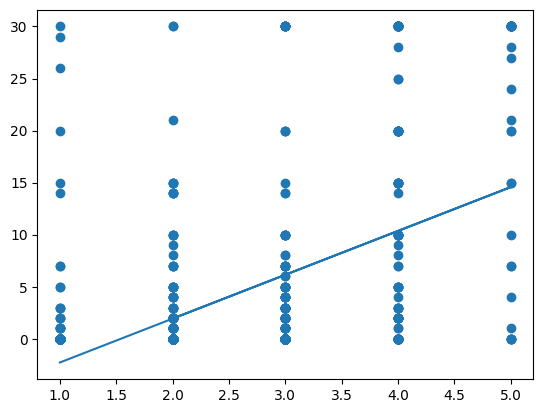

In [56]:
plt.scatter(X_test, y_test)
plt.plot(X_test,predictions)

In [57]:
# szybkie przeczytanie dla danej wartości:
model.predict([[3.5]])

array([8.25250421])